# Cell Segmentation using Seeded Watershed Algorithm

In this notebook, we will perform cell segmentation on an image depicting membrane-like structures, using the seeded watershed algorithm. Local minima will be used as seeds for the watershed process to achieve effective segmentation.

In [1]:
import numpy as np
from skimage.io import imread, imsave
import napari_simpleitk_image_processing as nsitk
import napari_segment_blobs_and_things_with_membranes as nsbatwm
import stackview
import matplotlib.pyplot as plt

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_tools_menu/__init__.py:10: UserWarning: Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.
  warnings.warn("Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.")
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_skimage_regionprops/_table.py:7: UserWarning: No Qt bindings could be found
  warnings.warn(str(e))


## Load the Image

We start by loading the image from the provided URL. The image appears to show a network of polygonal structures, likely representing cellular outlines.

In [2]:
image_url = "https://github.com/user-attachments/assets/3b813c91-e001-4df0-84e2-3ca1045fdc1b"
image = imread(image_url)

## Pre-process the Image

Denoise the image using a Gaussian blur to smooth out noise while preserving edges.

In [3]:
smoothed_image = nsbatwm.gaussian_blur(image, sigma=1)

## Detect Seeds

Identify the local minima of the smoothened image to be used as seeds for the watershed algorithm.

In [4]:
seeds = nsitk.regional_maxima(smoothed_image)

## Perform Watershed Segmentation

Utilize the local minima identified above as seeds for the watershed segmentation.

In [5]:
segmented_image = nsbatwm.local_minima_seeded_watershed(smoothed_image, spot_sigma=3, outline_sigma=1)

## Visualize Results

Display the original and segmented images using StackView and Matplotlib for comparison.

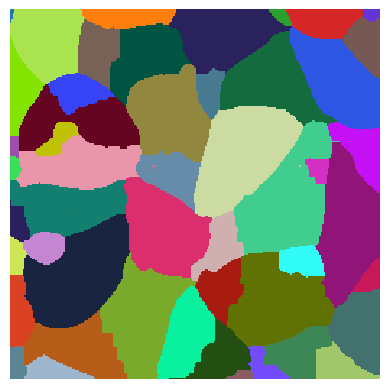

In [6]:
stackview.insight(image)
stackview.imshow(segmented_image, labels=True)

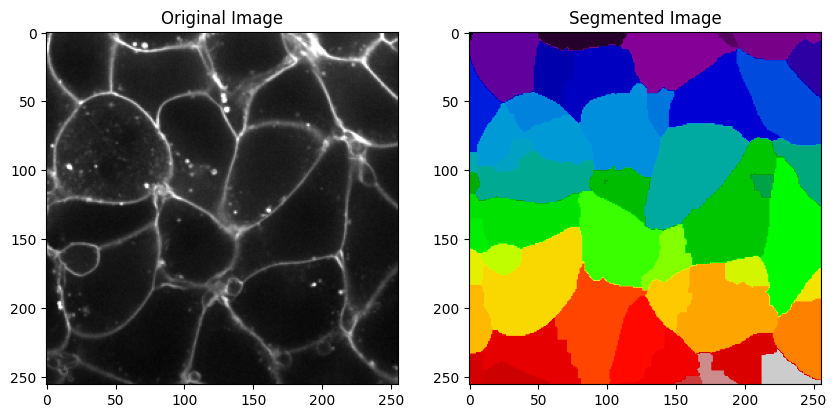

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(segmented_image, cmap='nipy_spectral')
axes[1].set_title('Segmented Image')
plt.savefig('segmented_comparison.png')
plt.show()

## Save Segmented Image

The segmented label image is converted to an 8-bit format for saving as a PNG file.

In [8]:
segmented_image_8bit = (segmented_image / np.max(segmented_image) * 255).astype(np.uint8)
imsave('segmented_image.png', segmented_image_8bit)